In [2]:
import pandas as pd

rdos = pd.read_excel('datos/datos_Martin_rdo.xlsx')
 
cluster_std = pd.read_excel('datos/cluster_std.xlsx')

cluster = pd.read_excel('datos/cluster.xlsx')

display(rdos.head())
print(rdos.shape)

,a_Tocopherol,g_Tocopherol,d_Tocopherol,a_g_d_Tocopherol,Palmitic_Acid,Palmitoleic_Acid,Stearic_Acid,Oleic_Acid,Linoleic_Acid,Linolenic_Acid,...,RDUO 0 a_g_d_Tocopherol,RDUO 0 Palmitic_Acid,RDUO 0 Palmitoleic_Acid,RDUO 0 Stearic_Acid,RDUO 0 Oleic_Acid,RDUO 0 Linoleic_Acid,RDUO 0 Linolenic_Acid,RDUO 0 Arachidic_Acid,RDUO 0 Ecosenoic_Acid,RDUO 0 OSI
0,502.64,826.36,6.18,1335.18,4.26,0.20,2.04,64.49,20.41,7.11,...,257.853462,0.212692,0.025769,0.003462,-2.428462,2.493462,-0.389231,0.019231,0.03,0.531154
1,511.20,788.10,7.36,1306.66,4.24,0.20,1.96,64.51,20.48,7.01,...,229.333462,0.192692,0.025769,-0.076538,-2.408462,2.563462,-0.489231,0.089231,0.06,-0.398846
2,317.95,726.27,0.00,1044.22,3.96,0.17,1.89,65.69,18.65,7.92,...,-33.106538,-0.087308,-0.004231,-0.146538,-1.228462,0.733462,0.420769,0.059231,0.30,-0.558846
3,356.28,796.46,7.22,1159.96,4.45,0.19,2.21,65.64,18.53,7.51,...,82.633462,0.402692,0.015769,0.173462,-1.278462,0.613462,0.010769,-0.010769,0.03,0.621154
4,405.68,745.75,3.79,1155.22,4.17,0.17,1.95,65.82,19.38,7.04,...,77.893462,0.122692,-0.004231,-0.086538,-1.098462,1.463462,-0.459231,-0.110769,0.12,1.491154


(104, 57)


### Cluster Residuos estandarizados de pearson

In [3]:
X_segmentation = cluster.drop("Cultivar", axis=1)

c:\Users\marti\anaconda3\envs\ads2\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


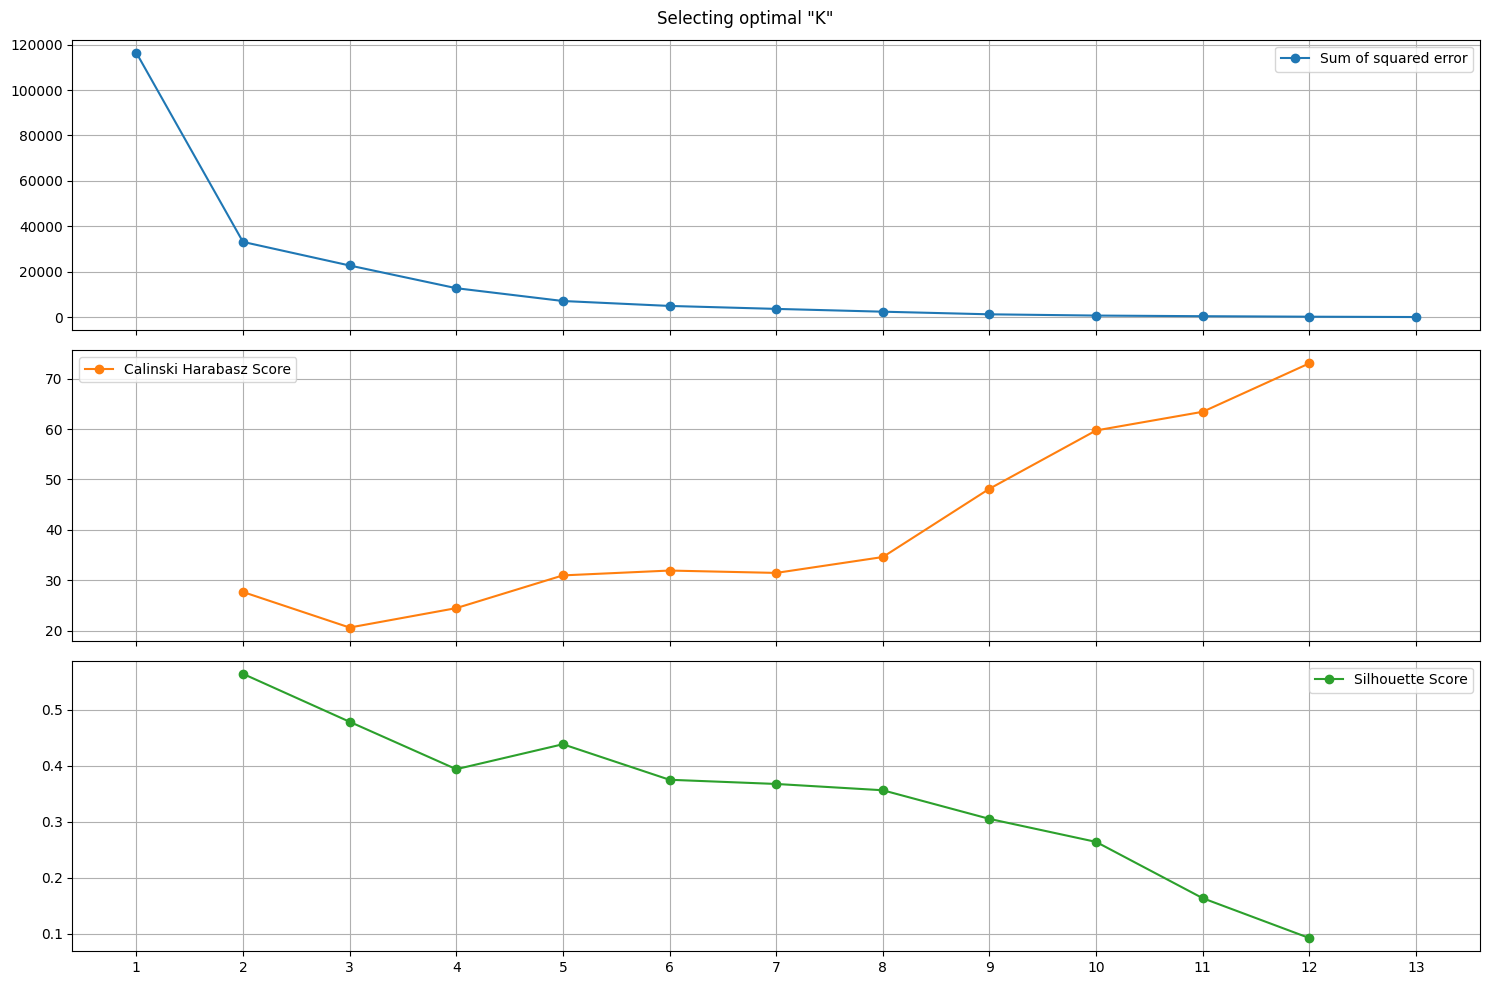

In [14]:
from sklearn.cluster import KMeans
from sklearn.metrics import calinski_harabasz_score, silhouette_score
import matplotlib.pyplot as plt

search_range = range(1, 14)
report = {}
for k in search_range:
    temp_dict = {}
    kmeans = KMeans(init='k-means++',
                    algorithm='auto',
                    n_clusters=k,
                    max_iter=1000,
                    random_state=1,
                    verbose=0).fit(X_segmentation)
    inertia = kmeans.inertia_
    temp_dict['Sum of squared error'] = inertia
    try:
        cluster = kmeans.predict(X_segmentation)
        chs = calinski_harabasz_score(X_segmentation, cluster)
        ss = silhouette_score(X_segmentation, cluster)
        temp_dict['Calinski Harabasz Score'] = chs
        temp_dict['Silhouette Score'] = ss
        report[k] = temp_dict
    except:
        report[k] = temp_dict

report_df = pd.DataFrame(report).T
report_df.plot(figsize=(15, 10),
               xticks=search_range,
               grid=True,
               title=f'Selecting optimal "K"',
               subplots=True,
               marker='o',
               sharex=True)
plt.tight_layout()

SSE = 2
Calinski = 12, 8, 5
Silhouette = 2, pero interesante 5

### Cluster_std Residuos estandarizados de pearson, de vuelta estandarizados

In [4]:
X_segmentation = cluster_std.drop("Cultivar", axis=1)

c:\Users\marti\anaconda3\envs\ads2\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


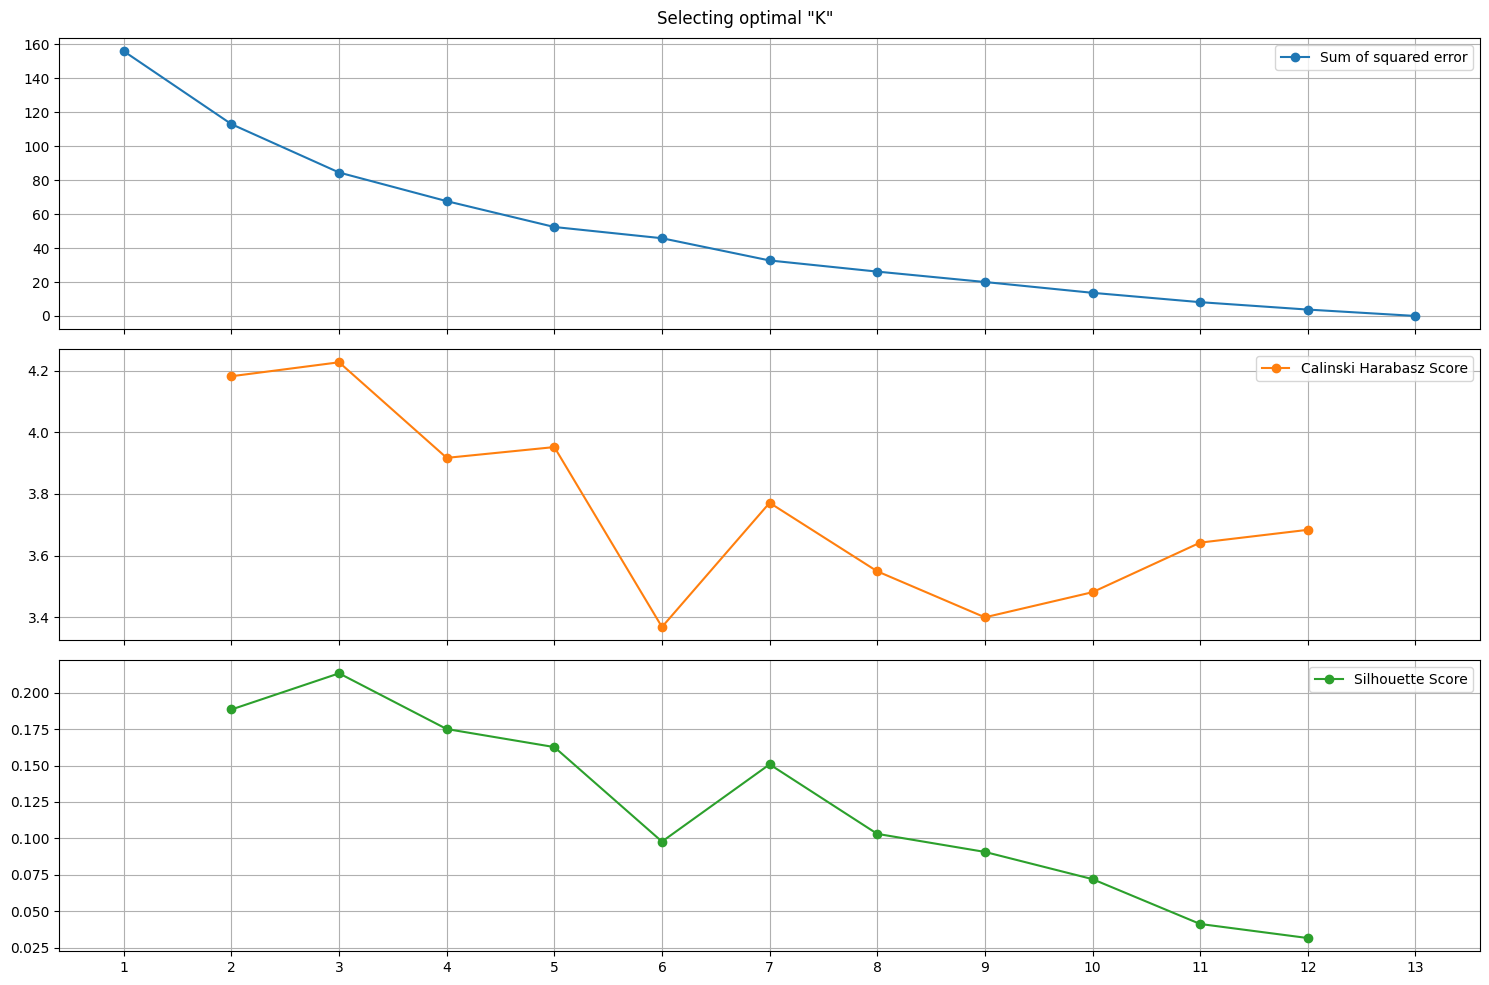

In [11]:
from sklearn.cluster import KMeans
from sklearn.metrics import calinski_harabasz_score, silhouette_score
import matplotlib.pyplot as plt

search_range = range(1, 14)
report = {}
for k in search_range:
    temp_dict = {}
    kmeans = KMeans(init='k-means++',
                    algorithm='auto',
                    n_clusters=k,
                    max_iter=1000,
                    random_state=1,
                    verbose=0).fit(X_segmentation)
    inertia = kmeans.inertia_
    temp_dict['Sum of squared error'] = inertia
    try:
        cluster = kmeans.predict(X_segmentation)
        chs = calinski_harabasz_score(X_segmentation, cluster)
        ss = silhouette_score(X_segmentation, cluster)
        temp_dict['Calinski Harabasz Score'] = chs
        temp_dict['Silhouette Score'] = ss
        report[k] = temp_dict
    except:
        report[k] = temp_dict

report_df = pd.DataFrame(report).T
report_df.plot(figsize=(15, 10),
               xticks=search_range,
               grid=True,
               title=f'Selecting optimal "K"',
               subplots=True,
               marker='o',
               sharex=True)
plt.tight_layout()

Tiene sentido que con esos estandarizados de pearson el K sea 2 por resultados que veo en jerarquico. 

# Vuelvo a hacer con residuos minmax scalling y estandarizados, pero no partiendo de los de pearson

In [5]:
import pandas as pd

cluster_std = pd.read_excel('datos/cluster_std_rdos.xlsx')
 
cluster_mm = pd.read_excel('datos/cluster_mm.xlsx')

### RESIDUOS ESTANDARIZADOS.

In [6]:
X_segmentation = cluster_std.drop("Cultivar", axis=1)

c:\Users\marti\anaconda3\envs\ads2\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


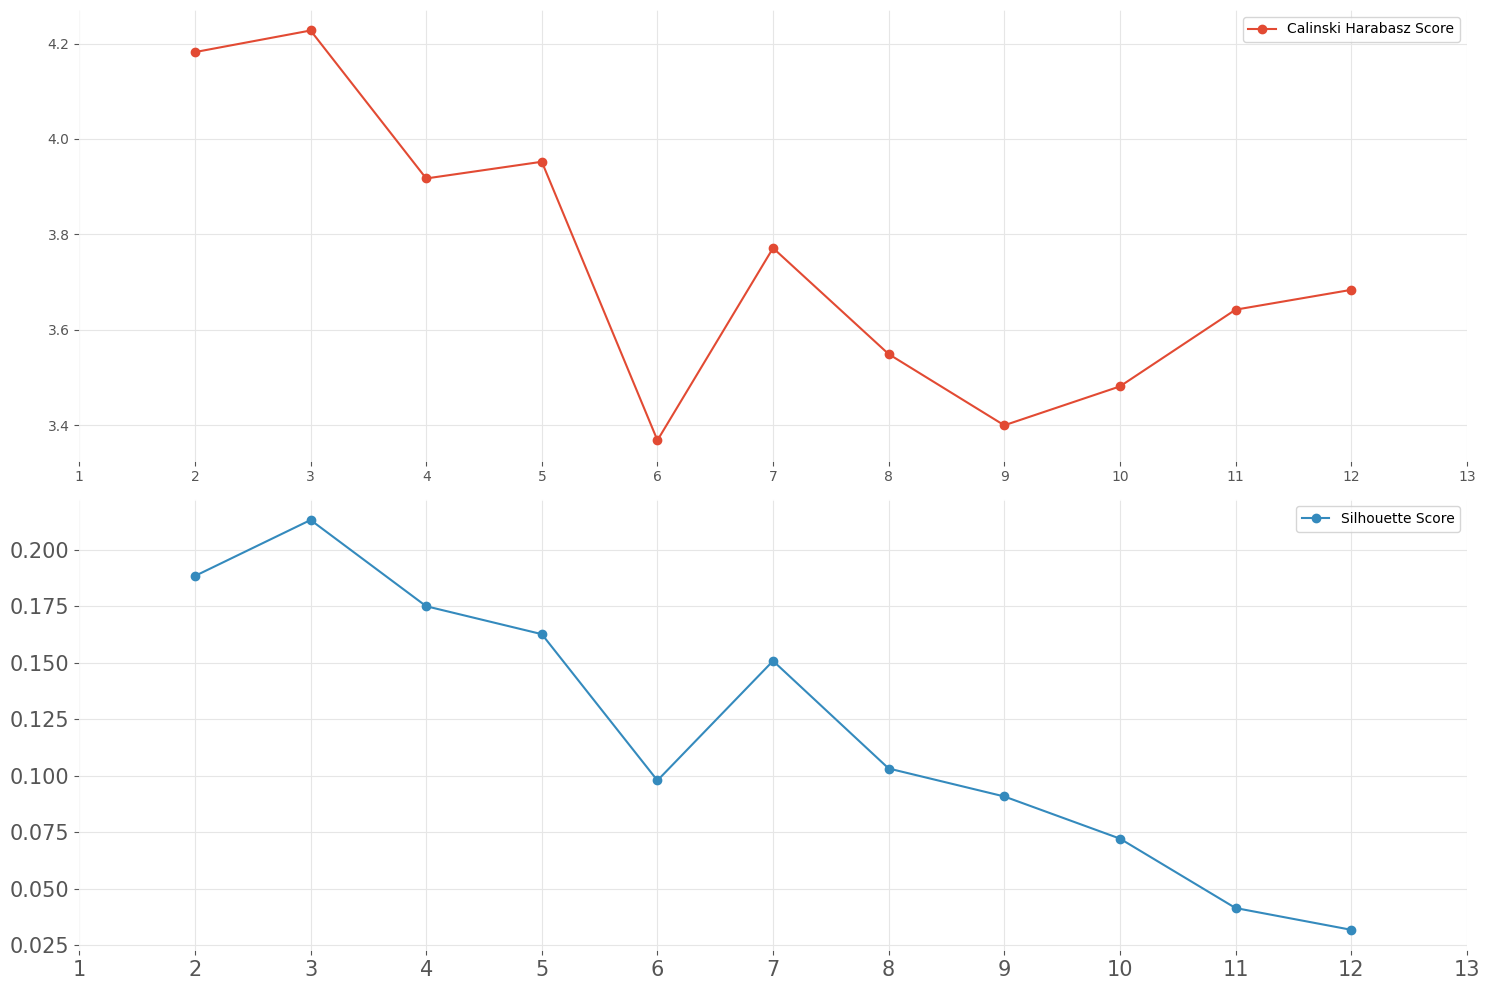

In [21]:
from sklearn.cluster import KMeans
from sklearn.metrics import calinski_harabasz_score, silhouette_score
import matplotlib.pyplot as plt

theme_bw = "theme_bw.mplstyle"
plt.style.use(theme_bw)

search_range = range(1, 14)
report = {}
for k in search_range:
    temp_dict = {}
    kmeans = KMeans(init='k-means++',
                    algorithm='auto',
                    n_clusters=k,
                    max_iter=1000,
                    random_state=1,
                    verbose=0).fit(X_segmentation)
    inertia = kmeans.inertia_
    # temp_dict['Suma de errores cuadrados'] = inertia
    try:
        cluster = kmeans.predict(X_segmentation)
        chs = calinski_harabasz_score(X_segmentation, cluster)
        ss = silhouette_score(X_segmentation, cluster)
        temp_dict['Calinski Harabasz Score'] = chs
        temp_dict['Silhouette Score'] = ss
        report[k] = temp_dict
    except:
        report[k] = temp_dict

report_df = pd.DataFrame(report).T
report_df.plot(figsize=(15, 10),
               xticks=search_range,
               grid=True,
               title=f'',
               subplots=True,
               marker='o',
               sharex=True)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.tight_layout()

K = 3 
Me parece que voy con este, son residuos normales, y estandarizo.
Resultados similares que con residuos estandarizados de pearson. 

### RESIDUOS minmax scalling.

In [4]:
X_segmentation = cluster_mm.drop("Cultivar", axis=1)

c:\Users\marti\anaconda3\envs\ads2\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


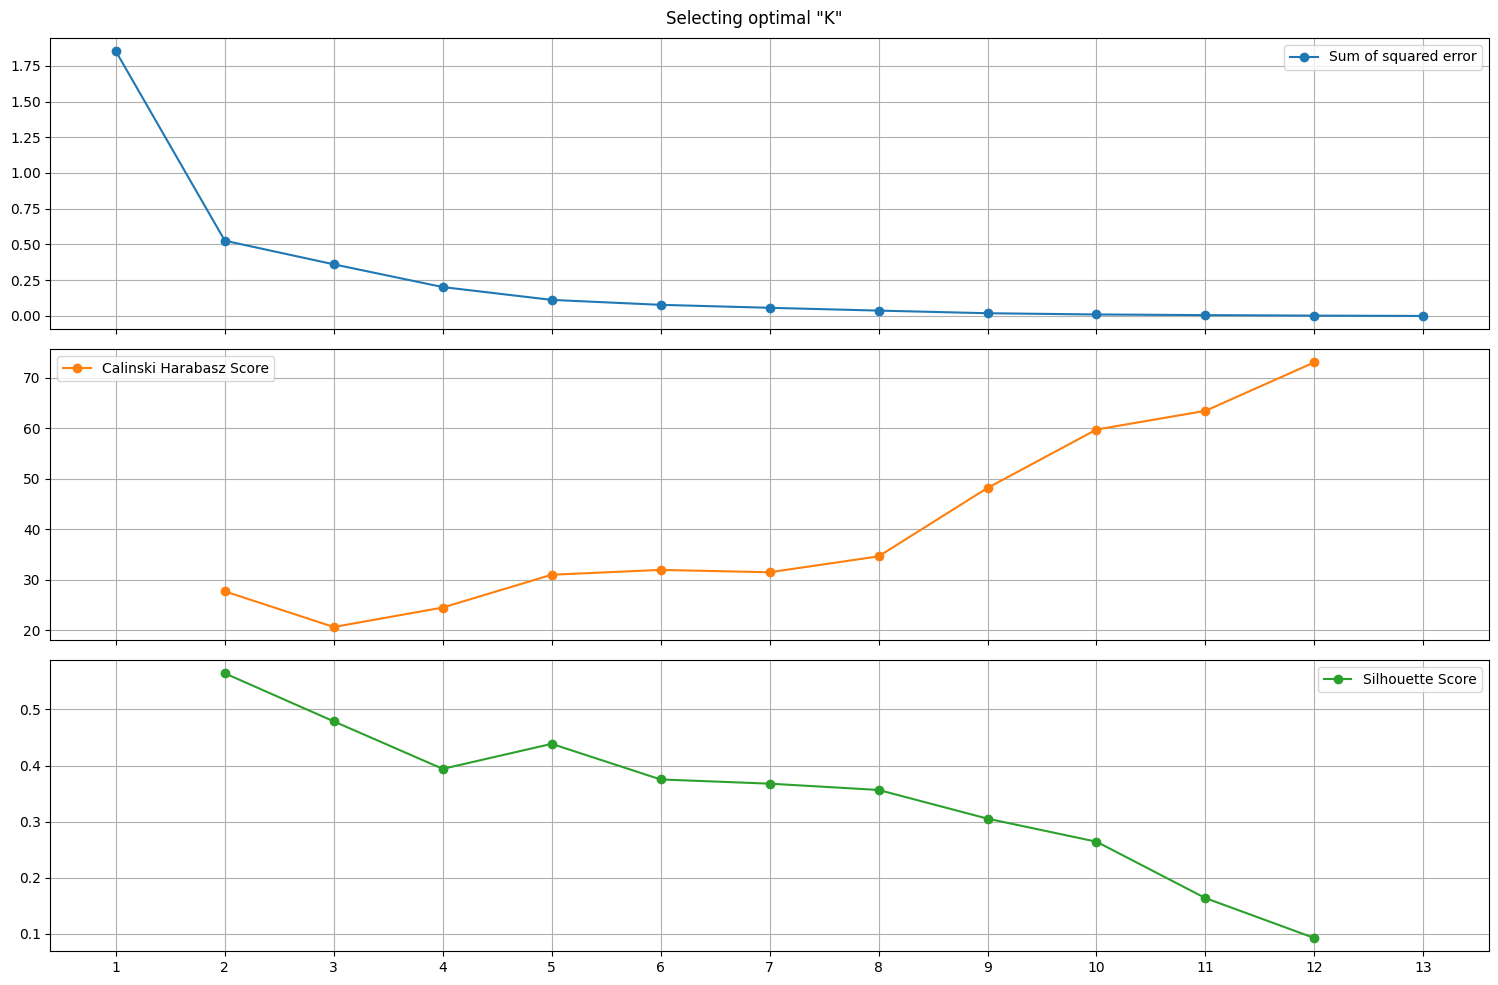

In [5]:
from sklearn.cluster import KMeans
from sklearn.metrics import calinski_harabasz_score, silhouette_score
import matplotlib.pyplot as plt

search_range = range(1, 14)
report = {}
for k in search_range:
    temp_dict = {}
    kmeans = KMeans(init='k-means++',
                    algorithm='auto',
                    n_clusters=k,
                    max_iter=1000,
                    random_state=1,
                    verbose=0).fit(X_segmentation)
    inertia = kmeans.inertia_
    temp_dict['Sum of squared error'] = inertia
    try:
        cluster = kmeans.predict(X_segmentation)
        chs = calinski_harabasz_score(X_segmentation, cluster)
        ss = silhouette_score(X_segmentation, cluster)
        temp_dict['Calinski Harabasz Score'] = chs
        temp_dict['Silhouette Score'] = ss
        report[k] = temp_dict
    except:
        report[k] = temp_dict

report_df = pd.DataFrame(report).T
report_df.plot(figsize=(15, 10),
               xticks=search_range,
               grid=True,
               title=f'Selecting optimal "K"',
               subplots=True,
               marker='o',
               sharex=True)
plt.tight_layout()

In [23]:
report_df.to_csv("datos/k_optimo.csv")

K = 2
o K = 5. 
